<a href="https://colab.research.google.com/github/HechengJin0/MGC/blob/master/mgc_local_corr_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mgcpy
!pip install hyppo

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#read timeseries X and Y 
X=pd.read_csv('/gdrive/My Drive/X.csv', sep=',',header=None).values
Y=pd.read_csv('/gdrive/My Drive/Y.csv', sep=',',header=None).values
print(X.shape)
print(Y.shape)

(240, 1)
(240, 1)


# test with archived MGC package - mgcpy

(240, 239)


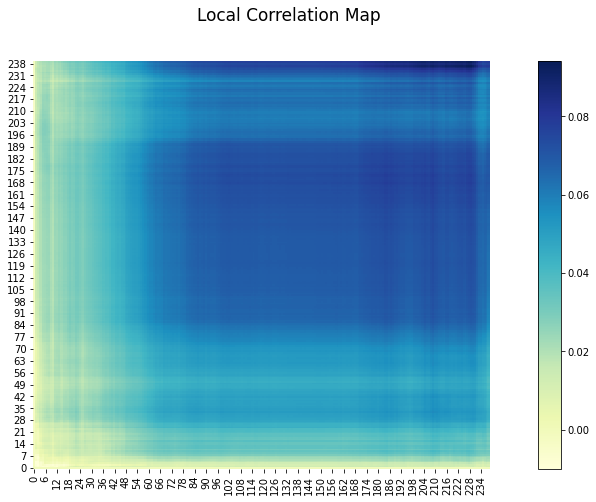

In [18]:
# test with archived MGC package - mgcpy
from mgcpy.independence_tests.mgc import MGC
mgc = MGC()
test_statistic, metadata = mgc.test_statistic(X, Y)
local_correlation_matrix = metadata["local_correlation_matrix"]
print(local_correlation_matrix.shape)

# draw heatmap
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
fig.suptitle("Local Correlation Map", fontsize=17)
ax = sns.heatmap(local_correlation_matrix, cmap="YlGnBu", ax=ax, cbar=False)
cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()

# test with new MGC package - hyppo

(240, 239)


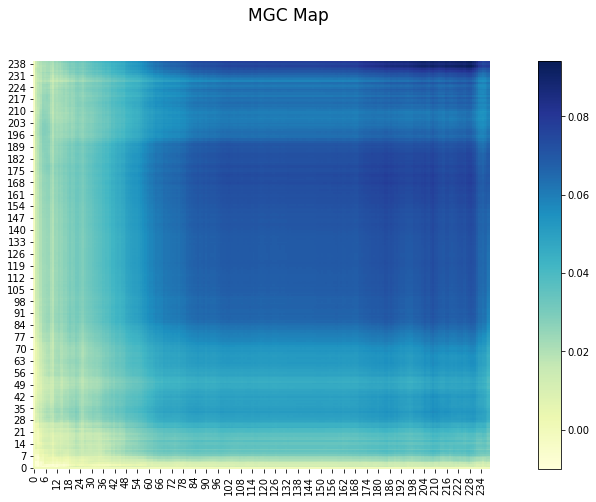

In [21]:
# test with new MGC package - hyppo
from hyppo.independence import MGC
mgc_hyppo = MGC()
stat,pvalue,mgc_dict=mgc_hyppo.test(X, Y)
print(mgc_dict['mgc_map'].shape)

# draw heatmap
fig, (ax, cax) = plt.subplots(ncols=2, figsize=(9.45, 7.5),  gridspec_kw={"width_ratios":[1, 0.05]})
fig.suptitle("MGC Map", fontsize=17)
ax = sns.heatmap(mgc_dict['mgc_map'], cmap="YlGnBu", ax=ax, cbar=False)
cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
ax.invert_yaxis()